In [2]:
import re
import regex
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime


In [3]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [4]:
def FindAuthor(author):
  author=author.split(":")
  if len(author)==2:
    return True
  else:
    return False

In [5]:
def dataPointAndroid(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [6]:
def dataPointios(line):
    splitLine = line.split('] ')
    dateTime = splitLine[0]
    if ',' in dateTime:
        date, time = dateTime.split(',')
    else:
        date, time = dateTime.split(' ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(':')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    if time[5]==":":
        time = time[:5]+time[-3:]
    else:
        if 'AM' in time or 'PM' in time:
            time = time[:6]+time[-3:]
        else:
            time = time[:6]
    return date, time, author, message

In [7]:
Data = [] 
chat = 'WhatsApp Chat with ASEB CSE_A 19-23 Batch.txt' 
with open(chat, encoding="utf-8") as fp:
    device=''
    first=fp.readline()
    print(first)
    if '[' in first:
      device='ios'
    else:
      device="android"
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None 
    while True:
        line = fp.readline() 
        if not line: 
            break
        if device=="ios":
          line = line.strip()
          if startsWithDateAndTimeios(line):
            if len(messageBuffer) > 0:
              Data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = dataPointios(line)
            messageBuffer.append(message)
          else:
            line= (line.encode('ascii', 'ignore')).decode("utf-8")
            if startsWithDateAndTimeios(line):
              if len(messageBuffer) > 0:
                Data.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
              date, time, author, message = dataPointios(line)
              messageBuffer.append(message)
            else:
              messageBuffer.append(line)
        else:
          line = line.strip()
          if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0:
              Data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = dataPointAndroid(line)
            messageBuffer.append(message)
          else:
            messageBuffer.append(line)

26/07/2019, 3:43 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.



In [8]:
if device =='android':
        df = pd.DataFrame(Data, columns=['Date', 'Time', 'Author', 'Message'])
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.dropna()
        urlpattern = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(urlpattern, x)).str.len()
else:
        df = pd.DataFrame(Data, columns=['Date', 'Time', 'Author', 'Message']) 
        df = df.dropna()
        df["Date"] = df["Date"].apply(dateconv)
        df["Date"] = pd.to_datetime(df["Date"],format='%Yd-%m-%y')
        df["emoji"] = df["Message"].apply(split_count)
        urlpattern = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(urlpattern, x)).str.len()

In [9]:
df.head()

Date     Time           Author  \
1 2019-07-26  3:53 pm  +91 90165 38357   
2 2019-07-26  3:53 pm      Vardhan CSE   
3 2019-07-26  3:53 pm  +91 90165 38357   
4 2019-07-26  3:54 pm  +91 90165 38357   
5 2019-07-26  4:05 pm  +91 90165 38357   

                                             Message  urlcount  
1   Everyone if Ur friend isn't added.....pls sha...         0  
2                        Bro I am having shall I add         0  
3                    Yes I'll make u the admin again         0  
4                                         Add em all         0  
5                 Hey girl admins pls add Ur friends         0

In [10]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13607 entries, 1 to 14420
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      13607 non-null  datetime64[ns]
 1   Time      13607 non-null  object        
 2   Author    13607 non-null  object        
 3   Message   13607 non-null  object        
 4   urlcount  13607 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 637.8+ KB


In [11]:
df.Author.unique() 

array(['+91 90165 38357', 'Vardhan CSE', '+91 90141 69344',
       '+91 91087 87504', 'Jaswanth', 'Nikhilesh @CSE', 'Sreeram @CSE A',
       'Aravind @CSE A', '+91 80080 62920', 'Kamalnath Reddy',
       'Akhil@CSE', 'Maneesh', '+91 70937 72729', '+91 85005 37889',
       'Srikar @CSE A', '+91 98453 95482', 'Sravan @CSE A',
       '+91 81093 01182', 'Anirudh', '+91 93412 98981', '+91 88613 75207',
       '+91 83103 02646', 'Kishan @amrita', 'Deshik', 'Raj Kumar Cse',
       '+91 6362 336 608', 'Viswas', 'Rohith Narasaraopet', 'Tarun Kumar',
       '+91 95354 82452', 'Balu @CSE A', '+91 99485 51099',
       '+91 86889 50882', 'Yeswanth@CSE', 'Saya Reddy', 'Sai Pavan @CSE',
       'Syam Sai Cse', '+91 86395 23359', '+91 87628 00416',
       'Gopi Manoj @CSE', 'Kapardhi', 'Gopi Krishna @CSE A',
       'A D I T Y A  R O H I T H', 'Charan @CSE A', '+91 96187 95033',
       'Rakesh Narasaraopetta', '+91 93902 30943', '+91 96524 55816',
       '+91 81068 40324', '+91 86882 58385', '+91 88670 

In [12]:
df = df.dropna() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13607 entries, 1 to 14420
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      13607 non-null  datetime64[ns]
 1   Time      13607 non-null  object        
 2   Author    13607 non-null  object        
 3   Message   13607 non-null  object        
 4   urlcount  13607 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 637.8+ KB


In [13]:
total_msg = df.shape[0]
print(total_msg)

13607


In [14]:
media_msg = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_msg)

0


In [15]:
urlpattern = r'(https?://\S+)' #regex pattern matching with start with https
df['urlcount'] = df.Message.apply(lambda x: re.findall(urlpattern, x)).str.len() #return url which matches with pattern and count it through lambda function
links = np.sum(df.urlcount) #sumup all the links
print(links)

816


In [16]:
link_msg= df[df['urlcount']>0]
deleted_msg=df[(df["Message"] == " You deleted this message")| (df["Message"] == " This message was deleted.")]
media_msg_df = df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')]
msg_df = df.drop(media_msg_df.index)
msg_df = msg_df.drop(deleted_msg.index)
msg_df = msg_df.drop(link_msg.index)

In [17]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 14419
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11123 non-null  datetime64[ns]
 1   Time      11123 non-null  object        
 2   Author    11123 non-null  object        
 3   Message   11123 non-null  object        
 4   urlcount  11123 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 521.4+ KB


In [18]:
msg_df['Letter_Count'] = msg_df['Message'].apply(lambda s : len(s))
msg_df['Word_Count'] = msg_df['Message'].apply(lambda s : len(s.split(' ')))
msg_df["MessageCount"]=1

In [19]:
msg_df

Date     Time           Author  \
1     2019-07-26  3:53 pm  +91 90165 38357   
2     2019-07-26  3:53 pm      Vardhan CSE   
3     2019-07-26  3:53 pm  +91 90165 38357   
4     2019-07-26  3:54 pm  +91 90165 38357   
5     2019-07-26  4:05 pm  +91 90165 38357   
...          ...      ...              ...   
14414 2022-05-16  4:59 pm  +91 95354 82452   
14416 2022-05-16  5:50 pm  +91 98869 91112   
14417 2022-05-17  9:09 am          Anirudh   
14418 2022-05-17  1:17 pm  +91 84317 59073   
14419 2022-05-17  1:18 pm  +91 84317 59073   

                                                 Message  urlcount  \
1       Everyone if Ur friend isn't added.....pls sha...         0   
2                            Bro I am having shall I add         0   
3                        Yes I'll make u the admin again         0   
4                                             Add em all         0   
5                     Hey girl admins pls add Ur friends         0   
...                                                  ...       ...   
14414                                        Fine thanks         0   
14416   Hello everyone, I am sending the first six mo...         0   
14417                           This message was deleted         0   
14418   Tomorrow no DS class The 5 teams that have th...         0   
14419                                     ~Sreebha ma'am         0   

       Letter_Count  Word_Count  MessageCount  
1                81          12             1  
2                28           8             1  
3                32           8             1  
4                11           4             1  
5                35           8             1  
...             ...         ...           ...  
14414            12           3             1  
14416           152          29             1  
14417            25           5             1  
14418           114          21             1  
14419            15           3             1  

[11123 rows x 8 columns]

In [20]:
users = msg_df.Author.unique()

for i in range(len(users)):
  req_df= msg_df[msg_df["Author"] == users[i]]
  print(f'Stats of {users[i]} -')
  print('Messages Sent', req_df.shape[0])
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  media = media_msg_df[media_msg_df['Author'] == users[i]].shape[0]
  print('Media Messages Sent', media)
  links = sum(link_msg[link_msg['Author'] == users[i]]["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of +91 90165 38357 -
Messages Sent 1488
Words per message 11.868951612903226
Media Messages Sent 349
Links Sent 81

Stats of Vardhan CSE -
Messages Sent 123
Words per message 4.764227642276423
Media Messages Sent 5
Links Sent 0

Stats of +91 90141 69344 -
Messages Sent 26
Words per message 6.461538461538462
Media Messages Sent 7
Links Sent 5

Stats of +91 91087 87504 -
Messages Sent 398
Words per message 10.625628140703517
Media Messages Sent 63
Links Sent 51

Stats of Jaswanth -
Messages Sent 67
Words per message 4.701492537313433
Media Messages Sent 5
Links Sent 2

Stats of Nikhilesh @CSE -
Messages Sent 195
Words per message 6.517948717948718
Media Messages Sent 60
Links Sent 1

Stats of Sreeram @CSE A -
Messages Sent 31
Words per message 5.548387096774194
Media Messages Sent 10
Links Sent 0

Stats of Aravind @CSE A -
Messages Sent 37
Words per message 4.54054054054054
Media Messages Sent 3
Links Sent 0

Stats of +91 80080 62920 -
Messages Sent 85
Words per message 8.317647058

Text(0, 0.5, 'Time')

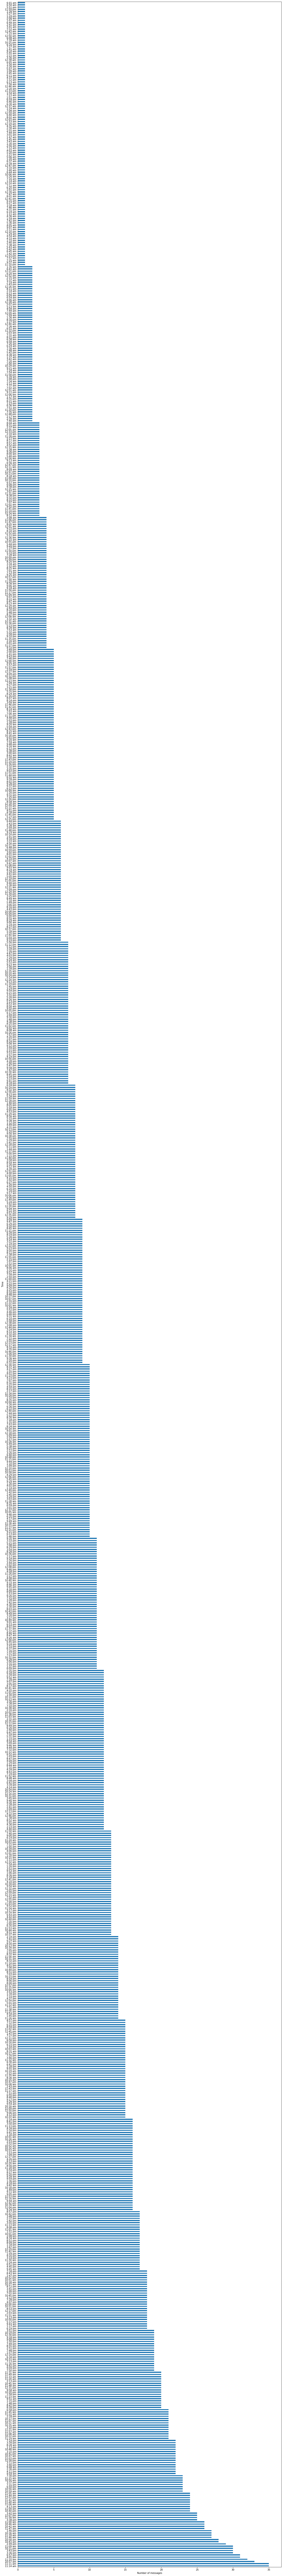

In [21]:
plt.figure(figsize=(20,200))
msg_df['Time'].value_counts().plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [22]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)
df = df[['Date','Day','Time','Author','Message']]
df['Day'] = df['Day'].astype('category')
df.head()

Date     Day     Time           Author  \
1 2019-07-26  Friday  3:53 pm  +91 90165 38357   
2 2019-07-26  Friday  3:53 pm      Vardhan CSE   
3 2019-07-26  Friday  3:53 pm  +91 90165 38357   
4 2019-07-26  Friday  3:54 pm  +91 90165 38357   
5 2019-07-26  Friday  4:05 pm  +91 90165 38357   

                                             Message  
1   Everyone if Ur friend isn't added.....pls sha...  
2                        Bro I am having shall I add  
3                    Yes I'll make u the admin again  
4                                         Add em all  
5                 Hey girl admins pls add Ur friends

In [23]:
l = df.Day.unique()
for i in range(len(l)):
  req_df = df[df["Day"] == l[i]]
  print(l[i],'  ->  ',req_df.shape[0])

Friday   ->   2157
Saturday   ->   1652
Sunday   ->   1312
Monday   ->   2422
Tuesday   ->   2242
Wednesday   ->   2123
Thrusday   ->   1699


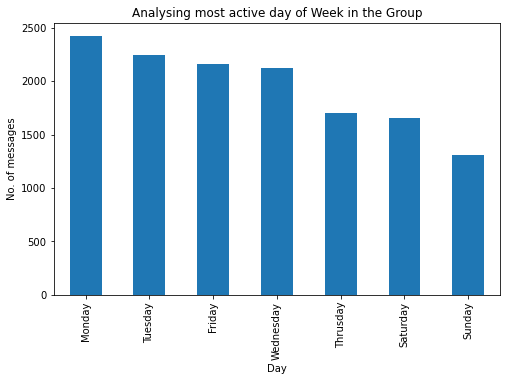

In [24]:
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts() 
active_day.plot.bar()
plt.xlabel('Day')
plt.ylabel('No. of messages')
plt.title('Analysing most active day of Week in the Group')
plt.show()

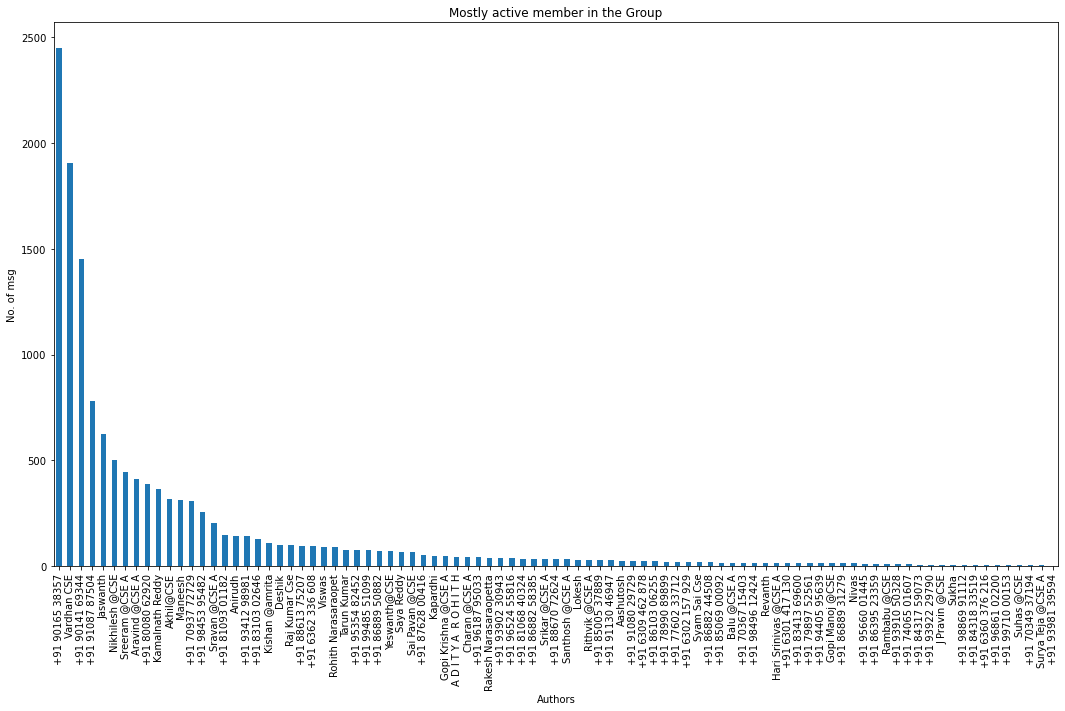

In [25]:
plt.figure(figsize=(18,10))
mostly_active = df['Author'].value_counts()
x = np.arange(len((mostly_active)))
mostly_active.plot.bar()
plt.xlabel('Authors')
plt.ylabel('No. of msg')
plt.title('Mostly active member in the Group')
plt.xticks(x,users)
plt.show()

In [26]:
import plotly.express as px
z = df['Date'].value_counts() 
z1 = z.to_dict()
df['Msg_count'] = df['Date'].map(z1)
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title='Analysing the number of message per day using TimeSeries plot.',
                  xaxis_title='Month',
                  yaxis_title='No. of Messages')
fig.update_xaxes(nticks=10)
fig.show()

In [27]:
df['Year'] = df['Date'].dt.year
df['Mon'] = df['Date'].dt.month
months = {
     1 : 'January',
     2 : 'February',
     3 : 'March',
     4 : 'April',
     5 : 'May',
     6 : 'June',
     7 : 'July',
     8 : 'August',
     9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}
df['Month'] = df['Mon'].map(months)
df.drop('Mon',axis=1,inplace=True)

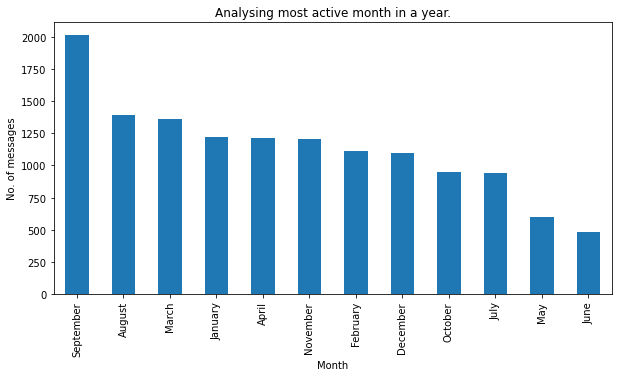

In [28]:
plt.figure(figsize=(10,5))
active_month = df['Month'].value_counts()
active_month.plot.bar()
plt.xlabel('Month')
plt.ylabel('No. of messages')
plt.title('Analysing most active month in a year.')
plt.show()

In [29]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
msg_sentiment = SentimentIntensityAnalyzer()
df["Positive"] = [msg_sentiment.polarity_scores(i)["pos"] for i in df["Message"]]
df["Negative"] = [msg_sentiment.polarity_scores(i)["neg"] for i in df["Message"]]
df["Neutral"] = [msg_sentiment.polarity_scores(i)["neu"] for i in df["Message"]]
print(df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            Date      Day     Time           Author  \
1     2019-07-26   Friday  3:53 pm  +91 90165 38357   
2     2019-07-26   Friday  3:53 pm      Vardhan CSE   
3     2019-07-26   Friday  3:53 pm  +91 90165 38357   
4     2019-07-26   Friday  3:54 pm  +91 90165 38357   
5     2019-07-26   Friday  4:05 pm  +91 90165 38357   
...          ...      ...      ...              ...   
14416 2022-05-16   Monday  5:50 pm  +91 98869 91112   
14417 2022-05-17  Tuesday  9:09 am          Anirudh   
14418 2022-05-17  Tuesday  1:17 pm  +91 84317 59073   
14419 2022-05-17  Tuesday  1:18 pm  +91 84317 59073   
14420 2022-05-17  Tuesday  7:10 pm  +91 98869 91112   

                                                 Message  Msg_count  Year  \
1       Everyone if Ur friend isn't added.....pls sha...         48  2019   
2                            Bro I am having shall I add         48  2019   
3                        Yes I'll make u the admin again         48  2019   
4                              

In [30]:
a = sum(df["Positive"])
b = sum(df["Negative"])
c = sum(df["Neutral"])

def sentiment_score(x, y, z):
    if (x>y) and (x>z):
        print("Positive  ")
    elif (y>x) and (y>z):
        print("Negative  ")
    else:
        print("Neutral  ")
sentiment_score(a, b, c)

Neutral  
